# testing 

In [8]:
from dynamics import ClassDynamics
from network import ClassNetwork


# parameter setting
nb_banks=30
alpha_init=0.01  # initial cash (< 1/(1-gamma) - beta)
alpha=0.01
beta_init=0.5 # initial collateral  (< 1/(1-gamma) - alpha)
beta_reg=0.5
beta_star=0.5
gamma=0.03 # if too big, the lux version generates huge shocks
collateral_value=1.0
initialization_method="pareto"
alpha_pareto=1.3
shocks_method="non-conservative"
shocks_law="normal-mean-reverting"
shocks_vol=0.05
result_location="./results/single_run/test/"
min_repo_trans_size=1e-8  # 1e-8
nb_steps=int(1e2)
dump_period=int(5e2)
plot_period=int(5e2)
cp_option=True
LCR_mgt_opt=True
heavy_plot=False
notice_period=0

# initialize ClassNetwork
Network = ClassNetwork(
    nb_banks=nb_banks,
    alpha_init=alpha_init,
    beta_init=beta_init,
    beta_reg=beta_reg,
    beta_star=beta_star,
    alpha=alpha,
    gamma=gamma,
    collateral_value=collateral_value,
    initialization_method=initialization_method,
    alpha_pareto=alpha_pareto,
    shocks_method=shocks_method,
    shocks_law=shocks_law,
    shocks_vol=shocks_vol,
    LCR_mgt_opt=LCR_mgt_opt,
    min_repo_trans_size=min_repo_trans_size,
    notice_period=notice_period,
)

# initialize ClassDynamics
dynamics = ClassDynamics(
    Network,
    nb_steps=nb_steps,
    path_results=result_location,
    dump_period=dump_period,
    plot_period=plot_period,
    cp_option=cp_option,
    heavy_plot=heavy_plot,
)

# simulate
dynamics.simulate()

simulate the repo market


 51%|█████     | 50/99 [00:04<00:04, 11.93it/s]

RecursionError: maximum recursion depth exceeded in comparison

# analysis

In [2]:
import sys
sys.getrecursionlimit()

3000

In [4]:
import numpy as np 
for chain in Network.chains_rev_repo:
   if  len(np.unique (np.array(chain))) < len(np.array(chain)):
      print("error")

In [3]:
max = 0 
min = 19
sum = 0
for chain in Network.chains_rev_repo:
   if  len(chain) > max:
      max = len(chain)
   if  len(chain) < min:
      min = len(chain)
   sum +=len(chain)

print(max)
print(min)
print(sum/len(Network.chains_rev_repo))

10
2
5.307344632768362


In [7]:
Network.chains_rev_repo

[[13, 6, 21, 3, 1, 8, 0],
 [7, 10, 20, 16, 1, 8, 0],
 [7, 10, 20, 16, 13, 0],
 [7, 10, 20, 16, 13, 12, 8, 0],
 [7, 10, 20, 16, 13, 9, 8, 0],
 [7, 10, 20, 16, 13, 5, 8, 0],
 [7, 10, 20, 8, 0],
 [7, 10, 20, 16, 13, 19, 0],
 [7, 10, 20, 16, 13, 4, 8, 0],
 [7, 10, 18, 5, 8, 0],
 [13, 6, 21, 3, 12, 8, 0],
 [7, 10, 20, 16, 13, 3, 12, 8, 0],
 [7, 10, 20, 16, 13, 17, 3, 12, 8, 0],
 [7, 10, 20, 16, 13, 6, 5],
 [7, 10, 20, 13, 0],
 [7, 10, 20, 13, 12, 8, 0],
 [7, 10, 20, 13, 9, 8, 0],
 [7, 10, 20, 13, 5, 8, 0],
 [7, 10, 20, 13, 6, 5],
 [7, 10, 20, 13, 19, 0],
 [7, 10, 20, 13, 4, 8, 0],
 [7, 10, 20, 13, 3, 12, 8, 0],
 [7, 10, 20, 13, 17, 3, 12, 8, 0],
 [7, 10, 18, 1, 8, 0],
 [7, 10, 20, 16],
 [7, 10, 20, 16, 13, 6, 5],
 [7, 10, 18, 11, 8, 0],
 [7, 10, 20, 16, 13, 11, 8, 0],
 [7, 10, 20, 13, 11, 8, 0],
 [4, 12, 8, 0],
 [13, 6, 21, 3, 0],
 [7, 10, 20, 16, 13, 3, 0],
 [7, 10, 20, 16, 13, 17, 3, 0],
 [7, 10, 20, 13, 3, 0],
 [7, 10, 20, 13, 17, 3, 0],
 [7, 10, 20, 16, 13, 5, 14, 22, 12],
 [7, 10, 18, 

<AxesSubplot: >

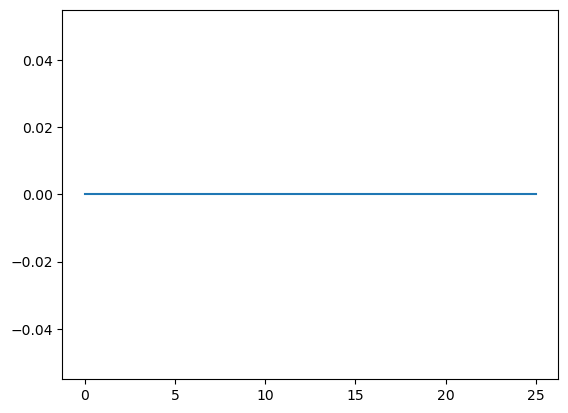

In [6]:
dynamics.df_network_trajectory["securities reused tot. network"].plot()